In [10]:
# This Python file uses the following encoding: utf-8
from PyQt6 import QtCore

import pickle
import os


def make_index(file):
    origins = []
    current_origin = 0

    original_position = file.tell()
    file.seek(0)

    while True:
        try:
            pickle.load(file)
            origins.append(current_origin)
            current_origin = file.tell()
        except EOFError:
            break

    file.seek(original_position)

    return origins

class DaqFile(QtCore.QObject):
    # Provides appending and random access to pickled objects in a file

    def __init__(self, filename):
        super().__init__()
        self.filename = filename
        self.origins = None
        self.file = None

    def record(self):
        #does record require us to pickle??
        if(os.path.exists(self.filename)):
            print("Cannot overwrite an existing file")
            return
        self.file = open(self.filename, 'a+b')
        self.file = make_index(self.file)

    def playback(self):
        try:
            self.file = open(self.filename, 'r+b')
        except Exception as e:
            print(f"Exception: {e} in daqfile for playback")
            raise

        self.origins = make_index(self.file)
        return True

    def count(self):
        print(self.origins)
        print(type(self.origins))
        return len(self.origins)

    def get(self, n):
        self.file.seek(self.origins[n])
        return pickle.load(self.file)

    def append(self, obj):
        original_position = self.file.tell()

        self.file.seek(0, os.SEEK_END)
        self.origins.append(self.file.tell())
        pickle.dump(obj, self.file)

        self.file.seek(original_position)

    def seek(self, index):
        self.file.seek(self.origins[index])

    def next(self):
        # may throw EOFError
        return pickle.load(self.file)

    def close(self):
        self.file.close()


In [11]:
daqfile = DaqFile('C:\\Users\\MichaelKolb\\Downloads\\2024.02.29-14.26.55.npy')
print(type(daqfile))
print(daqfile)
daqfile.playback()
print(daqfile.count())

<class '__main__.DaqFile'>
[0, 390352, 780704, 1171056, 1561408, 1951760, 2342112, 2732464, 3122816, 3513168, 3903520, 4293872, 4684224, 5074576, 5464928, 5855280, 6245632, 6635984, 7026336, 7416688, 7807040, 8197392, 8587744, 8978096, 9368448, 9758800, 10149152, 10539504, 10929856, 11320208, 11710560, 12100912, 12491264, 12881616, 13271968, 13662320, 14052672, 14443024, 14833376, 15223728, 15614080, 16004432, 16394784, 16785136, 17175488, 17565840, 17956192, 18346544, 18736896, 19127248, 19517600, 19907952, 20298304, 20688656, 21079008, 21469360, 21859712, 22250064, 22640416, 23030768, 23421120, 23811472, 24201824, 24592176, 24982528, 25372880, 25763232, 26153584, 26543936, 26934288, 27324640, 27714992, 28105344, 28495696, 28886048, 29276400, 29666752, 30057104, 30447456, 30837808, 31228160, 31618512, 32008864, 32399216, 32789568, 33179920, 33570272, 33960624, 34350976, 34741328, 35131680, 35522032, 35912384, 36302736, 36693088, 37083440, 37473792, 37864144, 38254496, 38644848, 390352

In [12]:
import os

# unpacking the tuple
file_name, file_extension = os.path.splitext("/Users/pankaj/abc.txt")

print(file_name)
print(file_extension)

print(os.path.splitext("/Users/pankaj/.bashrc"))
print(os.path.splitext("/Users/pankaj/a.b/image.png"))

/Users/pankaj/abc
.txt
('/Users/pankaj/.bashrc', '')
('/Users/pankaj/a.b/image', '.png')


In [6]:
import pyqtgraph
from pyqtgraph.graphicsItems.ROI import ROI
from PyQt6.QtGui import QPainterPath

##NOTE: From pyqtgraph's implementation of ImageView
class PlotROI(ROI):
    def __init__(self, size, possize, randitem):
        super().__init__()
        pass
        #print(f"plotroi: {self} {size} {possize} {randitem}")
        #ROI.__init__(self, pos=[0,0], size=size) #, scaleSnap=True, translateSnap=True)
        #self.addScaleHandle([1, 1], [0, 0])
        #self.addRotateHandle([0, 0], [0.5, 0.5])

In [9]:
p = QPainterPath()
p.setElementPositionAt()
# p.currentPosition()
# print(p.contin)

PyQt6.QtCore.QPointF()


In [3]:
user_input = "Stop"
user_input = user_input.split()
print(type(user_input[0]))

<class 'str'>


In [2]:
pts = [[0.007122377202069383, 0.004009986652777811], [0.007959604679354998, 0.0022649879982193396], [0.009555946605858021, 0.003336888776756654]]
print(pts[0:])
print(pts[:][1:])

[[0.007122377202069383, 0.004009986652777811], [0.007959604679354998, 0.0022649879982193396], [0.009555946605858021, 0.003336888776756654]]
[[0.007959604679354998, 0.0022649879982193396], [0.009555946605858021, 0.003336888776756654]]


In [2]:
lol = [
    [1,2,3],
    [4,5,6],
    [7,8,9],
]
# tuple will have to have a print statement
# print(lol[[2],[2],[2]])

TypeError: list indices must be integers or slices, not tuple

In [9]:
import zmq

print(zmq.POLLOUT)
print(zmq.POLLIN)
print(zmq.POLLOUT|zmq.POLLIN)
track = zmq.MessageTracker()
print(not track.done)

2
1
3
False


In [2]:
import time
import datetime
finish = []

for x in range(1000):
    start = time.time_ns()
    datetime.datetime.now()
    finish.append(time.time_ns() - start)

tot = sum(finish)
avg = tot / len(finish)
print(f"total {tot} ns, average {avg} ns")

total 1003200 ns, average 1003.2 ns


In [5]:
timensList = [
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514034252800,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514051040500,
    1713901514067471000,
    1713901514067471000,
    1713901514067471000,
    1713901514067471000,
    1713901514067471000
]

diffList = []
for x in range(len(timensList)-1):
    diff = (timensList[x+1] - timensList[x])
    diffList.append(diff)

tot = sum(diffList)
avg = tot / len(timensList)

print(f"total time {tot} ns average time {avg} ns")
print(diffList)

total time 33218200 ns average time 332182.0 ns
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16787700, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16430500, 0, 0, 0, 0]


In [12]:
# importing PyQt6
import PyQt6
from PyQt6 import QtGui, QtWidgets, QtCore
 
# importing system
import sys
 
# importing numpy as np
import numpy as np
 
# importing pyqtgraph as pg
import pyqtgraph as pg


color_lost = []


# Create some random numbers
n = 100000
x = np.random.randn(n)
y = (1.5 * x) + np.random.randn(n)

# Estimate the 2D histogram
nbins = 200
H, xedges, yedges = np.histogram2d(x,y,bins=nbins)

# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)


# plot = pg.PlotWidget()
plot = pg.plot()
plot.setBackground('w')
plot.setXRange(0,nbins)
plot.setYRange(0,nbins)
# plot.setlimits(xMin=0,xMax=nbins,yMin=0,yMax=nbins)

# tr = QtGui.QTransform()  # prepare ImageItem transformation:
# tr.scale(6.0, 3.0)       # scale horizontal and vertical axes
# tr.translate(-1.5, -1.5) # move 3x3 image to locate center at axis origin

# image = np.eye(3)
# print(image)

# img = pg.ImageItem( image, levels=(0,1) ) # create example image
img = pg.ImageItem(H, levels=[0,50])
#need to set a color map that is probably about 500 colors long at least or set it so that at like 500 events it changes colors

newcolorlist=[]
# newcolorlist2=[]
# newcolorlist3=[]
for x in range(0,256,8):
    newcolorlist.append(((x),(0),(0)))
for x in range(0,256,8):
    newcolorlist.append(((255),(x),(0)))
for x in range(0,256,8):
    newcolorlist.append(((255),(255),(x)))
# newcolorlist.extend(newcolorlist2)
# newcolorlist = newcolorlist.reverse()
# print(newcolorlist.reverse())
newcolorlist.reverse()
cmap = pg.ColorMap(pos=None, color=newcolorlist)

# print(pg.colormap.get('CET-L19'))
# img.setColorMap(pg.colormap.get('CET-L19'))
img.setColorMap(cmap)
# img.setLevels((0,255))
# img = pg.ImageItem( image, levels=[[minR, maxR], [minG, maxG], [minB, maxB]] ) # create example image
# img.setTransform(tr) # assign transform

plot.addItem( img )  # add ImageItem to PlotItem
plot.showAxes(True)  # frame it with a full set of axes
plot.invertY(False)   # vertical axis counts top to bottom

QtWidgets.QApplication.exec()

0

In [3]:
print(np.linspace(0.0,1.0,6))

[0.  0.2 0.4 0.6 0.8 1. ]


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

[(255, 0, 0), (255, 3, 0), (255, 6, 0), (255, 9, 0), (255, 12, 0), (255, 15, 0), (255, 18, 0), (255, 21, 0), (255, 24, 0), (255, 27, 0), (255, 30, 0), (255, 33, 0), (255, 36, 0), (255, 39, 0), (255, 42, 0), (255, 45, 0), (255, 48, 0), (255, 51, 0), (255, 54, 0), (255, 57, 0), (255, 60, 0), (255, 63, 0), (255, 66, 0), (255, 69, 0), (255, 72, 0), (255, 75, 0), (255, 78, 0), (255, 81, 0), (255, 84, 0), (255, 87, 0), (255, 90, 0), (255, 93, 0), (255, 96, 0), (255, 99, 0), (255, 102, 0), (255, 105, 0), (255, 108, 0), (255, 111, 0), (255, 114, 0), (255, 117, 0), (255, 120, 0), (255, 123, 0), (255, 126, 0), (255, 129, 0), (255, 132, 0), (255, 135, 0), (255, 138, 0), (255, 141, 0), (255, 144, 0), (255, 147, 0), (255, 150, 0), (255, 153, 0), (255, 156, 0), (255, 159, 0), (255, 162, 0), (255, 165, 0), (255, 168, 0), (255, 171, 0), (255, 174, 0), (255, 177, 0), (255, 180, 0), (255, 183, 0), (255, 186, 0), (255, 189, 0), (255, 192, 0), (255, 195, 0), (255, 198, 0), (255, 201, 0), (255, 204, 0), (2

:Image   [x,y]   (z)
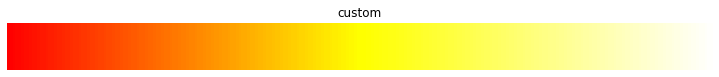

In [5]:
import colorcet as cc
from colorcet.plotting import swatch, swatches
import holoviews as hv
hv.extension('matplotlib')
from matplotlib.cm import get_cmap

# get_cmap("cet_fire")
# swatch('fire')


# colorlist = ['%06X' % idx for idx in range(0x8000, 0xffff)]
colorlist = ['#%06x' % idx for idx in range(0xff0000, 0xffffff, 0x000300)]
colorlist2 = ['#%06x' % idx for idx in range(0xffff00, 0xffffff, 0x000003)]
newcolorlist=[]
newcolorlist2=[]
for x in range(0,255,3):
    newcolorlist.append(((255),(x),(0)))
for x in range(0,255,3):
    newcolorlist2.append(((255),(255),(x)))
# print(colorlist)
# print(colorlist2)
# cmap=colorlist
colorlist.extend(colorlist2)
newcolorlist.extend(newcolorlist2)
print(newcolorlist)
# print(colorlist2)
print(len(colorlist))
swatch(name='custom', cmap=colorlist)

In [ ]:
import pandas as pd
# swatch('fire')

def apply_formatting(col, hex_colors):
    for hex_color in hex_colors:
        if col.name == hex_color:
            return [f'background-color: {hex_color}' for c in col.values]
                
def display_hex_colors(hex_colors):
    df = pd.DataFrame(hex_colors).T
    df.columns = hex_colors
    df.iloc[0,0:len(hex_colors)] = ""
    display(df.style.apply(lambda x: apply_formatting(x, hex_colors)))

# colorlist = ['%06X' % idx for idx in range(0x8000, 0xffff)]
colorlist = ['%06X' % idx for idx in range(0xff0000, 0xffff00, 0x000200)]
print(colorlist)
display_hex_colors(colorlist)